<a href="https://colab.research.google.com/github/Edersao/Atmosf-ricos/blob/main/areas_estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
#!pip show geopandas
import geopandas as gpd
import pandas as pd
import os
#import fiona
#import fsspec
os.chdir("/content/drive/MyDrive/Data Scientist/XOU/mygeodata/")
import glob

In [149]:
r5='/content/drive/MyDrive/Data Scientist/XOU/mygeodata/MAPA_GENERAL_PAZUELLO_-_5_PONTOS_SEM_RIO_2_1/'
r10='/content/drive/MyDrive/Data Scientist/XOU/mygeodata/MAPA_GENERAL_PAZUELLO_-_10_PONTOS_COM_RIO_1/'
arch5=os.listdir(r5)
arch10=os.listdir(r10)

In [160]:
def datos_xou(arch):
  d=[]
  for i in range(len(arch)):
    if arch[i][-4:] == '.shp':
      d.append(arch[i])
  return d

In [161]:
arch10=datos_xou(arch10)
arch5=datos_xou(arch5)

In [184]:
gpd10=gpd.read_file(r10+arch10[0])
gpd5=gpd.read_file(r5+arch5[0])
tod= pd.concat([gpd10, gpd5],ignore_index=True)
#archtod=arch10+arhc5
for i in arch5:
  geopd=gpd.read_file(r5+i)
  tod=pd.concat([tod,geopd],ignore_index=True)
for i in arch10:
  geopd=gpd.read_file(r10+i)
  tod=pd.concat([tod,geopd],ignore_index=True)

In [185]:
tod

,Name,descriptio,geometry
0,P1,P1 OCCIDENTE,POINT (-65.23569 -5.05542)
1,P2,P2 OCCIDENTE,POINT (-65.20864 -5.05551)
2,P3,P3 OCCIDENTE,POINT (-65.20908 -5.08284)
3,P4,P4 OCCIDENTE,POINT (-65.21417 -5.08275)
4,P5,P5 OCCIDENTE,POINT (-65.21868 -5.08455)
...,...,...,...
99,P5,P5 ORIENTE,POINT (-65.23602 -5.11586)
100,OCCIDENTE,None,"POLYGON ((-65.23569 -5.05542, -65.20864 -5.055..."
101,ORIENTE,None,"POLYGON ((-65.23517 -5.08822, -65.22382 -5.086..."
102,NOVA INVENÇÃO,None,"POLYGON ((-65.19960 -5.07762, -65.19230 -5.074..."


<Axes: >

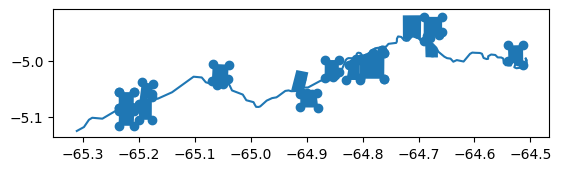

In [186]:
tod.plot()

In [188]:
!pip install contextily
import contextily as cx
import folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 63.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


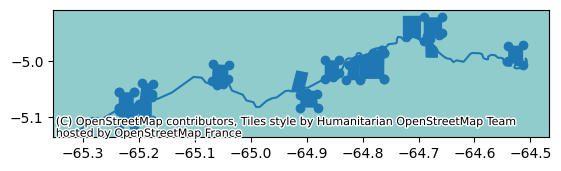

In [220]:
ax=tod.plot()
cx.add_basemap(ax)


In [272]:
tn=tod['Name'].unique()
#tn=['SANTA MARIA\xa0','PASSARINHO', 'INGAPUCU','FLORENTINO','CAJUEIRO',
 #   'JAUARY','JABURU','CASSIANO', 'RIO ITANHAUÃ', 'PEDRA NEGRA', 'PATAUA',
 #   'OCCIDENTE', 'ORIENTE', 'NOVA INVENÇÃO', 'PINICAPAU']
tn

array(['P1', 'P2', 'P3\xa0', 'P4', 'P5', 'P6', 'P7', 'SANTA MARIA\xa0',
       'PASSARINHO', 'INGAPUCU', 'P3', 'FLORENTINO', 'P2\xa0', 'CAJUEIRO',
       'JAUARY', 'P1\xa0', 'P4\xa0', 'P5\xa0', 'P7\xa0', 'JABURU',
       'CASSIANO', 'RIO ITANHAUÃ', 'PEDRA NEGRA', 'PATAUA', 'P8',
       'OCCIDENTE', 'ORIENTE', 'NOVA INVENÇÃO', 'PINICAPAU'], dtype=object)

In [211]:
td_e=tod.loc[(tod['Name'] == tn[0]) | (tod['Name'] == tn[1]) | (tod['Name'] == tn[2])
| (tod['Name'] == tn[3]) | (tod['Name'] == tn[4])| (tod['Name'] == tn[5])
| (tod['Name'] == tn[6])| (tod['Name'] == tn[7]) | (tod['Name'] == tn[8])
| (tod['Name'] == tn[9]) | (tod['Name'] == tn[10])| (tod['Name'] == tn[11])
| (tod['Name'] == tn[12])| (tod['Name'] == tn[13])| (tod['Name'] == tn[14])]

In [359]:
tod1=tod.dissolve(by='Name')
tod1.index
tod1.drop(tod1.index[ 9:-6],inplace=True)
tod1['nombres']=tod1.index
#td_E['geometry']
#td_e.loc[(type(td_e['geometry']) == type(td_e['geometry'][66]))]

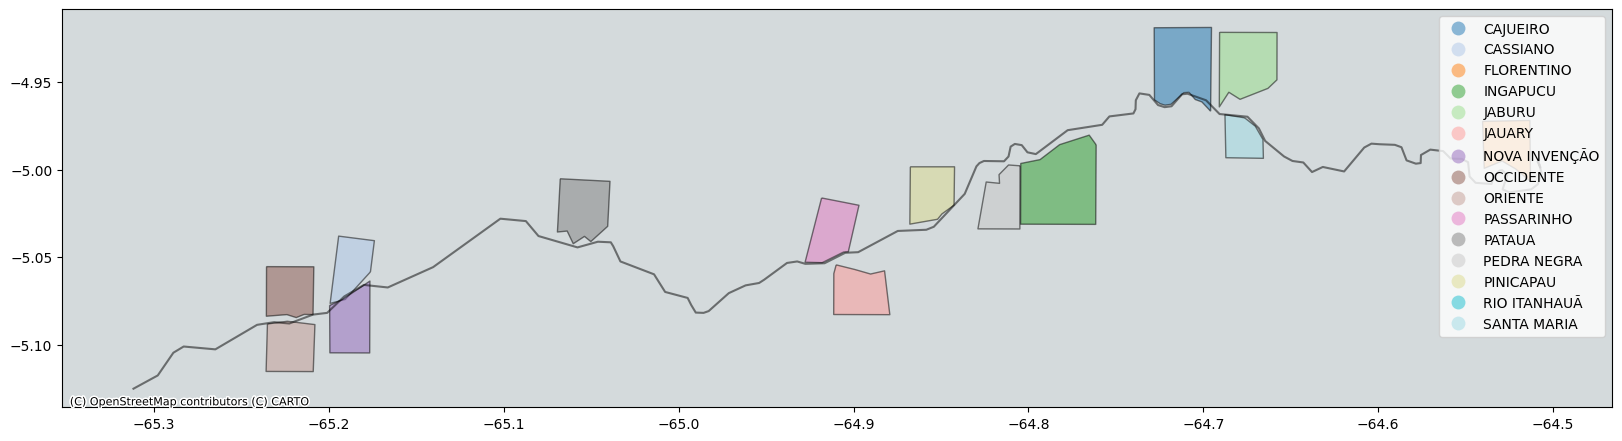

In [366]:
#ax=td_e.plot(figsize=(15, 15), alpha=0.5, edgecolor="k")
ax=tod1.plot(figsize=(20, 20), alpha=0.5, edgecolor="k" ,column='nombres',cmap='tab20',legend=True)
#cx.add_basemap(ax)
#ax.legend(loc="up_left")
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zoom=20)
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronOnlyLabels, zoom=20)


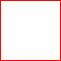

In [349]:
import numpy as np

image = np.zeros((61, 61))
image[0, :] = 1.0
image[60, :] = 1.0
image[:, 0] = 1.0
image[:, 60] = 1.0
attr = (
    'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)'
)
tiles = 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png'

#map = folium.Map(location=[-5.000, -65.0], tiles="CartoDB Positron", zoom_start=9)#tiles=tiles, attr=attr)
map = folium.Map(location=[-5.000, -65.0], tiles=tiles, attr=attr, zoom_start=9)
folium.GeoJson(tod1).add_to(map)
folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[-5.4, -65.40], [-4.7, -64.47]],
    colormap=lambda x: (1, 0, 0, x),
).add_to(map)
map


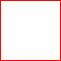

In [348]:
#Cartodb dark_matter cartodbpositron
import numpy as np

image = np.zeros((61, 61))
image[0, :] = 1.0
image[60, :] = 1.0
image[:, 0] = 1.0
image[:, 60] = 1.0
attr = (
    'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)'
)
tiles = 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png'
m = folium.Map([37, 0], zoom_start=2,tiles=tiles, attr=attr)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[-5, -66], [-4, -63]],
    colormap=lambda x: (1, 0, 0, x),
).add_to(m)

m

In [351]:
tod1

,geometry,descriptio
Name,,
CAJUEIRO,"POLYGON ((-64.69579 -4.96652, -64.70077 -4.961...",None
CASSIANO,"POLYGON ((-65.17626 -5.05842, -65.19064 -5.074...",None
FLORENTINO,"POLYGON ((-64.54026 -4.97236, -64.51322 -4.971...",None
INGAPUCU,"POLYGON ((-64.76124 -4.98575, -64.76148 -5.031...",None
JABURU,"POLYGON ((-64.69064 -4.92145, -64.65778 -4.921...",None
JAUARY,"POLYGON ((-64.90992 -5.05441, -64.89922 -5.057...",None
NOVA INVENÇÃO,"POLYGON ((-65.19960 -5.07762, -65.19230 -5.074...",None
OCCIDENTE,"POLYGON ((-65.23569 -5.05542, -65.20864 -5.055...",None
ORIENTE,"POLYGON ((-65.23517 -5.08822, -65.22382 -5.086...",None
